Assignment : California Housing Prices Regression
-

1 . Dataset Overview
-
**Data Set Characteristics:**
--

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Aim: The primary goal is to predict the median house value for California districts based on various demographic and geographic features.rget

    :Attribute Information:
        - longitude and latitude: Geographical coordinates of the houses.
        - housing_median_age: Median age of the houses.
        - total_rooms: Total number of rooms in the area.
        - total_bedrooms: Total number of bedrooms.
        - population: Population of the area.
        - households: Number of households in the area.
        - median_income: Median income of the population in the area.
        - MedHouseVal: Median house value (target variable).
        - ocean_proximity :It represents the distinct proximity to the ocean.

    :Missing Attribute Values: 
        - total_bedrooms ---> 207


In [1]:
### IMPORTING LIBRARIES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 

In [2]:
dataset = pd.read_csv('california_house.csv')  ## loading dataset

In [3]:
dataset.head() ## first five records

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
dataset.tail() ## last five records

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


2 . Data Preprocessing
-

In [5]:
dataset.info()  ##summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
dataset.describe()  ## STATISTICAL ANALYSIS OF THS DATA

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# Checking for missing values
dataset.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

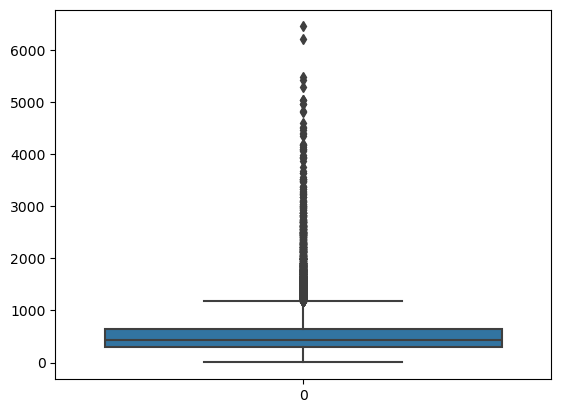

In [8]:
# Visualizing outliers using boxplots
import seaborn as sns
sns.boxplot(dataset['total_bedrooms'])


In [10]:
## HANDLING THE MISSING VALUE BY MEDIAN IMPUTATION
dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].median(), inplace=True)


In [11]:
dataset.isnull().sum()  ## AFTER HANDLING MISSING VALUE 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
dataset.info()  ## AFTER HANDLING NULL VALUES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
dataset.ocean_proximity.value_counts() 

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [15]:
dataset = dataset.drop(['ocean_proximity'], axis=1) # THIS FEATURE NOT PLAY IMPORTANT ROLE FOR PRIZE PREDICTION SO THAT'S WHY WE ARE DROPING THIS COLUMN

In [16]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


3 . Feature Selection
-

In [18]:
dataset.corr()  ## CORRELATION OF EACH FEATURE COMPARE TO OTHER FEATURES

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


<Axes: >

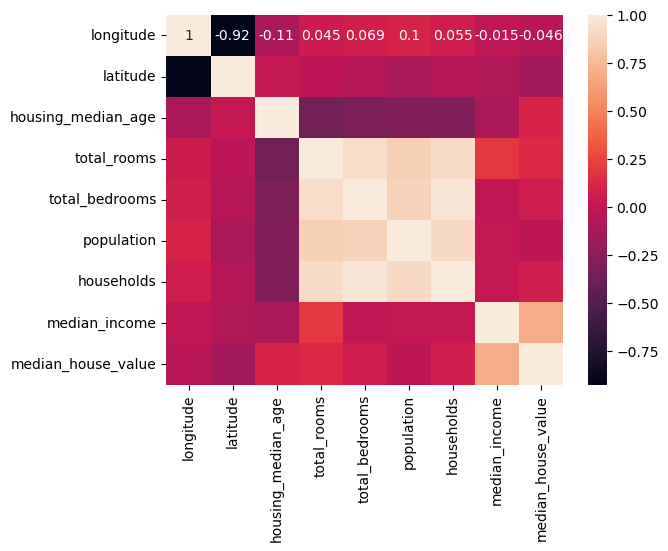

In [19]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

In [20]:
# Feature Engineering for House Price Prediction

# Calculating the average number of rooms per household
dataset['avg_rooms_per_family'] = dataset.eval('total_rooms / households')
# CONCLUSION: This metric shows the average number of rooms available to each family, which can impact house price.

# Estimating income per family to reflect economic standing
dataset['avg_income_per_family'] = dataset.eval('median_income / households')
# CONCLUSION: Represents the average income per family, providing insight into the economic condition and spending power.

# Calculating the ratio of bedrooms to total rooms
dataset['bedroom_to_room_ratio'] = dataset.eval('total_bedrooms / total_rooms')
# CONCLUSION: Shows the proportion of bedrooms out of the total rooms, which may affect the perceived value of the house.


<Axes: >

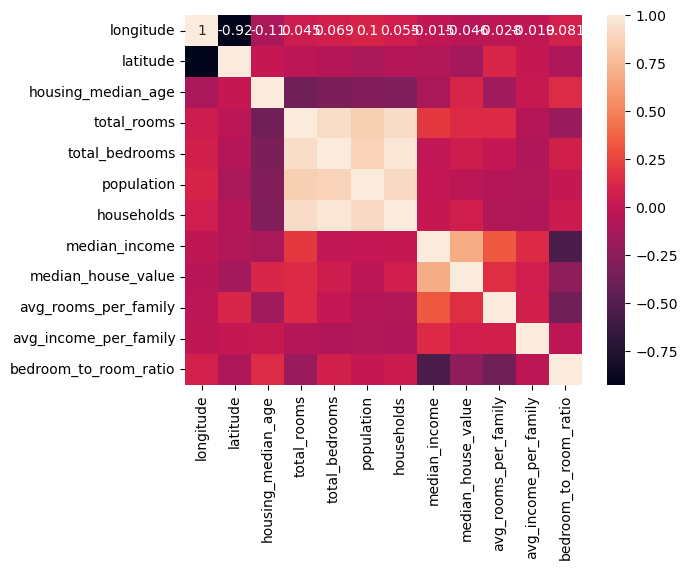

In [21]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

4 . Model Selection and Hyperparameter Tuning
-

Model Selection: Linear Regression
--
. I chose Linear Regression for its simplicity and effectiveness in predicting continuous values. It assumes a linear relationship between the features and target, minimizing the sum of squared errors to fit the best line.

Rationale for Choosing Linear Regression:
--
. Interpretability: Easy to understand how each feature impacts the target.

. Simplicity: Efficient for large datasets and requires minimal tuning.

. Baseline Model: A good starting point before considering more complex models, especially when the relationship is linear.

In [23]:
### DIVIDING THE DATASET INTO THE INDEPENDENT AND DEPENDENT FEATURE
X = dataset.drop('median_house_value', axis=1)  ## INDEPENDENT FEATURES
y = dataset['median_house_value']   ## TARGET(DEPENDENT) FEATURE

In [24]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,avg_rooms_per_family,avg_income_per_family,bedroom_to_room_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.066073,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.007295,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.041002,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.025768,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.014850,0.172096
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.004728,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.022428,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.003926,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.005350,0.219892


In [25]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [26]:
## DIVIDING THE DATASET INTO THE TRAIN AND TEST SPLIT FOR MODEL TRANING ####
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10) ## 33% of the data taken for testing  

In [27]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((13828, 11), (13828,), (6812, 11), (6812,))

In [28]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,avg_rooms_per_family,avg_income_per_family,bedroom_to_room_ratio
16750,-122.46,37.71,44.0,364.0,102.0,339.0,98.0,2.4830,3.714286,0.025337,0.280220
11962,-117.40,34.01,25.0,1858.0,366.0,1311.0,331.0,2.7083,5.613293,0.008182,0.196986
758,-122.07,37.66,21.0,5031.0,1168.0,2461.0,1042.0,3.8750,4.828215,0.003719,0.232161
17451,-120.46,34.71,17.0,2830.0,430.0,1035.0,416.0,4.9292,6.802885,0.011849,0.151943
17018,-122.29,37.52,38.0,3767.0,603.0,1455.0,615.0,6.8787,6.125203,0.011185,0.160074
...,...,...,...,...,...,...,...,...,...,...,...
9372,-122.53,37.93,37.0,1722.0,352.0,648.0,337.0,4.1250,5.109792,0.012240,0.204413
7291,-118.22,33.98,18.0,1781.0,765.0,1913.0,702.0,1.2059,2.537037,0.001718,0.429534
17728,-121.79,37.32,6.0,2850.0,561.0,2160.0,581.0,5.5336,4.905336,0.009524,0.196842
7293,-118.23,33.98,35.0,1366.0,496.0,2160.0,497.0,2.2059,2.748491,0.004438,0.363104


In [29]:
### FEATURE SCALING USING STANDARDIZATION TECHQNIQUE ####
#### StandardScaler ensures all features have a mean of 0 and a standard deviation of 1, which helps models that are sensitive to feature magnitude ###
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)  ### fit_transform will be done for only traning data bcz fit will calculate mean=0 and s.d=1
X_test_scaled=scaler.transform(X_test) ## for test data we do only transform 

In [30]:
X_train_scaled

array([[-1.43979718,  0.96929441,  1.22081889, ..., -0.70305988,
         0.07046615,  0.97590639],
       [ 1.08204942, -0.75823526, -0.28439808, ...,  0.07828001,
        -0.05552517, -0.25836996],
       [-1.2454256 ,  0.94594941, -0.60128586, ..., -0.2447376 ,
        -0.08830627,  0.2632353 ],
       ...,
       [-1.10587678,  0.78720344, -1.78961504, ..., -0.21300658,
        -0.04566819, -0.26050388],
       [ 0.66838683, -0.77224225,  0.50782138, ..., -1.10043274,
        -0.08302103,  2.2049985 ],
       [-1.15073176,  0.77786545, -0.99739558, ..., -0.60483749,
        -0.08675551,  0.94642654]])

In [31]:
X_test_scaled

array([[ 0.19491761, -0.68820027, -1.31428337, ..., -0.39376169,
         0.26075353,  0.0764579 ],
       [-1.36503888,  0.89459042, -0.12595418, ..., -0.33070668,
        -0.08133727,  0.34010282],
       [ 0.89764561, -0.91698123, -1.31428337, ..., -0.41007104,
        -0.08175478,  0.47896277],
       ...,
       [-0.43803598, -0.46875731,  0.27015554, ...,  0.04216837,
        -0.01529736, -0.68917151],
       [-1.96808915,  2.51006411, -0.91817364, ...,  0.66736933,
        -0.04435107,  0.09162826],
       [ 0.69330627, -0.74422826,  1.22081889, ..., -0.44835491,
        -0.0259013 ,  0.59992867]])

## Model Training

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
regression=LinearRegression()

In [34]:
regression


LinearRegression()

In [35]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [36]:
## slopes of 8 features
regression.coef_

array([-87434.15524529, -92951.67132342,  14922.10898623,  -8766.88440667,
         9588.86389374, -40571.43320807,  45040.88193286,  76124.08193578,
         9259.98048369,  -3119.85250798,  10303.30587382])

In [37]:
## Intercept
regression.intercept_

206347.68086491185

In [38]:
## Prediction (MODEL TESTING)
y_pred_test=regression.predict(X_test_scaled)

In [39]:
y_pred_test

array([275216.90648453, 275596.55942579, 266117.27790415, ...,
       312865.8426982 ,  69164.99668125, 179067.70507501])

Hyperparameter Tuning
--
Rationale for Selecting GridSearchCV:
--
    .Efficient Search: GridSearchCV systematically explores different hyperparameter combinations, ensuring optimal settings are not missed.

    .Efficient Search: GridSearchCV systematically explores different hyperparameter combinations, ensuring optimal settings are not missed.

    .Cross-Validation: Built-in cross-validation improves model generalization by evaluating on different data subsets, reducing overfitting

    .Performance Optimization: Even with few hyperparameters, GridSearchCV fine-tunes the model for better accuracy and performance.

    .Consistency & Reproducibility: It provides a consistent and reproducible approach to hyperparameter tuning, ideal for reliable results.

In [57]:
## Gridsearchcv
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import make_scorer, mean_squared_error

In [58]:
# Define the hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],  # Whether to fit the intercept
    'copy_X': [True, False]  # Whether to copy the data
}

In [59]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=regression, param_grid=param_grid, 
                           scoring=make_scorer(mean_squared_error, greater_is_better=False),
                           cv=5)  # 5-fold cross-validation

In [61]:
# Fit the GridSearch to the data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [62]:
# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'copy_X': True, 'fit_intercept': True}


In [64]:
# Get the best estimator
best_lin_reg = grid_search.best_estimator_

In [65]:
best_lin_reg

LinearRegression()

In [66]:
# Predict on the test set
y_pred = best_lin_reg.predict(X_test_scaled)

In [67]:
y_pred

array([275216.90648453, 275596.55942579, 266117.27790415, ...,
       312865.8426982 ,  69164.99668125, 179067.70507501])

5 . Model Testing and Output Metrics
--

In [72]:
## PErformance metrics cost function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("MEAN_SQUARED_ERROR ---> ",mean_squared_error(y_test,y_pred_test))
print("MEAN_ABSOLUTE_ERROR --->",mean_absolute_error(y_test,y_pred_test))
print("ROOT_MEAN_SQUARED_ERROR --->",np.sqrt(mean_squared_error(y_test,y_pred_test)))

MEAN_SQUARED_ERROR --->  4886981866.219962
MEAN_ABSOLUTE_ERROR ---> 50799.243894825755
ROOT_MEAN_SQUARED_ERROR ---> 69906.9514871015


In [77]:
## R square and Adjusted R square  ACCURACY OF THE MODEL
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print("Accuracy of the model using R_Squared ---->",score)

Accuracy of the model using R_Squared ----> 0.6403531053806408


Adjusted R-Squared: 0.640
--
Purpose: Adjusts R² for the number of predictors, useful for comparing models with different numbers of features.

In [80]:
## Adjusted R square
#display adjusted R-squared
print("Accuracy of the model using Adjusted_R_Squared ---->",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Accuracy of the model using Adjusted_R_Squared ----> 0.6397713236393447
